In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



In [25]:
df = pd.read_excel('Electric scooter - dataset.xlsx')
df.head()

,Ev scooter name,Manufacturer,Model,Features,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Age/Gender,Unnamed: 20
0,NaN,NaN,NaN,"Price (gross, PLN)","Price (gross, EUR)",Number of engines,Total nominal power [W],Electric voltage [V],Battery capacity [Ah],Range [km],...,Width [cm],Height [cm],Number of brakes,Type of brake,Type of amortization,Tire size [in],Maximum speed [kph],Weight [kg],Gender,Customers Age
1,Boyueda,Boyueda,Boyueda,4499,999.777778,2,5400,60,28.6,130,...,56,130,2,disc,front + rear,11,85,40,Male,41
2,Dualtron Eagle,Dualtron,Eagle,9999,2222,2,3600,60,22.4,80,...,60,120,2,hydraulic,front + rear,11,70,29,Female,46
3,Dualtron Mini,Dualtron,Mini,5999,1333.111111,1,1000,36,17.5,55,...,60,111.7,1,disc,front + rear,8.5,50,22,Female,38
4,Dualtron Spider,Dualtron,Spider,10499,2333.111111,2,3000,60,24.5,70,...,60.5,117,2,disc,front + rear,10,65,21.8,Male,36


In [26]:
df.iloc[0, 0:3] = ['Ev scooter name', 'Manufacturer', 'Model']
df.head()

,Ev scooter name,Manufacturer,Model,Features,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Age/Gender,Unnamed: 20
0,Ev scooter name,Manufacturer,Model,"Price (gross, PLN)","Price (gross, EUR)",Number of engines,Total nominal power [W],Electric voltage [V],Battery capacity [Ah],Range [km],...,Width [cm],Height [cm],Number of brakes,Type of brake,Type of amortization,Tire size [in],Maximum speed [kph],Weight [kg],Gender,Customers Age
1,Boyueda,Boyueda,Boyueda,4499,999.777778,2,5400,60,28.6,130,...,56,130,2,disc,front + rear,11,85,40,Male,41
2,Dualtron Eagle,Dualtron,Eagle,9999,2222,2,3600,60,22.4,80,...,60,120,2,hydraulic,front + rear,11,70,29,Female,46
3,Dualtron Mini,Dualtron,Mini,5999,1333.111111,1,1000,36,17.5,55,...,60,111.7,1,disc,front + rear,8.5,50,22,Female,38
4,Dualtron Spider,Dualtron,Spider,10499,2333.111111,2,3000,60,24.5,70,...,60.5,117,2,disc,front + rear,10,65,21.8,Male,36


In [27]:
# Drop the first row
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)
df.head()


,Ev scooter name,Manufacturer,Model,"Price (gross, PLN)","Price (gross, EUR)",Number of engines,Total nominal power [W],Electric voltage [V],Battery capacity [Ah],Range [km],...,Width [cm],Height [cm],Number of brakes,Type of brake,Type of amortization,Tire size [in],Maximum speed [kph],Weight [kg],Gender,Customers Age
0,Boyueda,Boyueda,Boyueda,4499,999.777778,2,5400,60,28.6,130,...,56,130,2,disc,front + rear,11,85,40,Male,41
1,Dualtron Eagle,Dualtron,Eagle,9999,2222,2,3600,60,22.4,80,...,60,120,2,hydraulic,front + rear,11,70,29,Female,46
2,Dualtron Mini,Dualtron,Mini,5999,1333.111111,1,1000,36,17.5,55,...,60,111.7,1,disc,front + rear,8.5,50,22,Female,38
3,Dualtron Spider,Dualtron,Spider,10499,2333.111111,2,3000,60,24.5,70,...,60.5,117,2,disc,front + rear,10,65,21.8,Male,36
4,Dualtron Thunder,Dualtron,Thunder,15999,3555.333333,2,5400,60,35,100,...,60.9,121.9,2,hydraulic,front + rear,11,80,43.5,Male,30


In [28]:
df['Gender'] = df['Gender'].replace('female', 'Female')

In [29]:
df.columns

Index(['Ev scooter name', 'Manufacturer', 'Model', 'Price (gross, PLN)',
       'Price (gross, EUR)', 'Number of engines', 'Total nominal power [W]',
       'Electric voltage [V]', 'Battery capacity [Ah]', 'Range [km]',
       'Length [cm]', 'Width [cm]', 'Height [cm]', 'Number of brakes',
       'Type of brake', 'Type of amortization', 'Tire size [in]',
       'Maximum speed [kph]', 'Weight [kg]', 'Gender', 'Customers Age'],
      dtype='object', name=0)

## DEMOGRAPHIC SEGMENTATION

##  How does the number of engines impact the price of electric scooters?

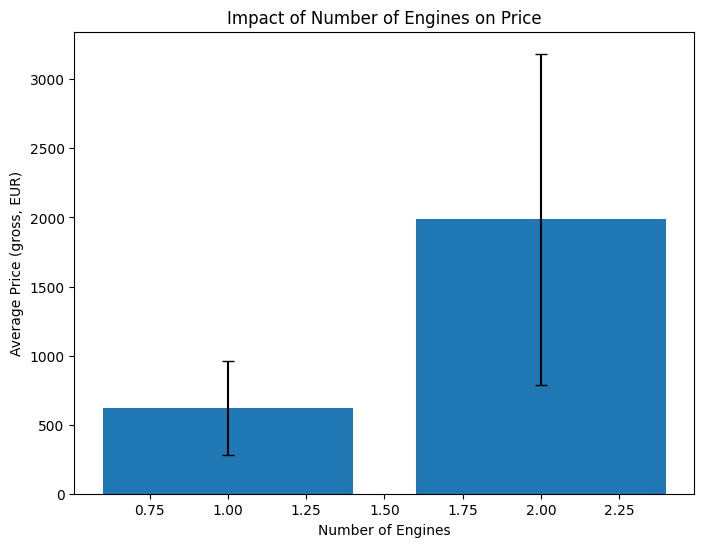

In [30]:
import matplotlib.pyplot as plt

engine_price_data = df.groupby('Number of engines')['Price (gross, EUR)'].mean().reset_index()
engine_price_std = df.groupby('Number of engines')['Price (gross, EUR)'].std().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(engine_price_data['Number of engines'], engine_price_data['Price (gross, EUR)'],
        yerr=engine_price_std['Price (gross, EUR)'], capsize=4)
plt.xlabel('Number of Engines')
plt.ylabel('Average Price (gross, EUR)')
plt.title('Impact of Number of Engines on Price')
plt.show()


## Observations:
The number of engines have an impact on the price of electric scooters.Electric scooters with a higher number of engines tend to be priced higher than those with a lower number of engines. This is because a higher number of engines often indicates increased power and performance, which can contribute to a higher price.


## How does the price distribution vary between different age groups?

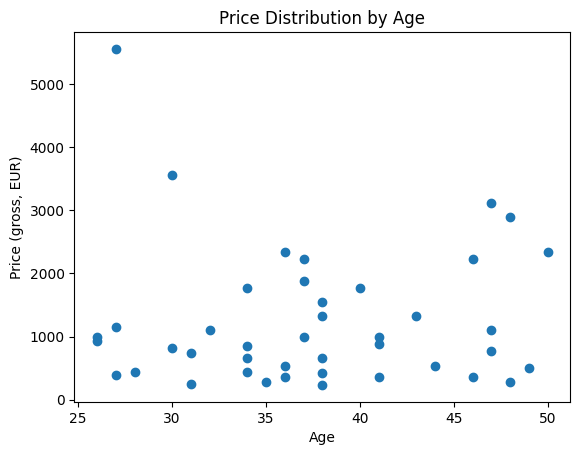

In [31]:
plt.scatter(df['Customers Age'], df['Price (gross, EUR)'])
plt.xlabel('Age')
plt.ylabel('Price (gross, EUR)')
plt.title('Price Distribution by Age')
plt.show()


## Observations: 
By examining the price distribution across age groups, we can identify trends and patterns related to consumer behavior and purchasing power. This information helps in understanding the preferences and buying capacity of different age segments.

## How does the battery capacity impact the price of electric scooters?

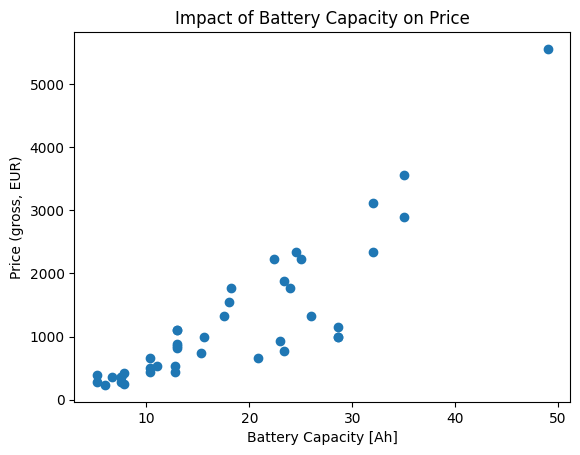

In [32]:
plt.scatter(df['Battery capacity [Ah]'], df['Price (gross, EUR)'])
plt.xlabel('Battery Capacity [Ah]')
plt.ylabel('Price (gross, EUR)')
plt.title('Impact of Battery Capacity on Price')
plt.show()






## Observations:
It can be seen from the plot that electric scooters with higher battery capacity tend to have a higher price compared to those with lower battery capacity. This is because a larger battery capacity allows for longer range and better performance, which are desirable features for many buyers.

## How does the price vary between different genders?

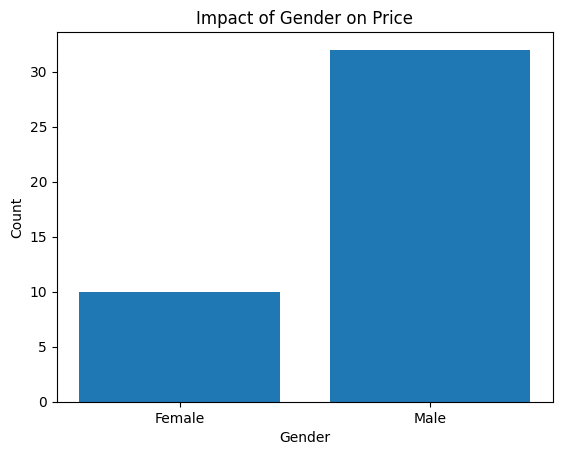

In [33]:
gender_price_data = df.groupby('Gender')['Price (gross, EUR)']

plt.bar(gender_price_data.groups.keys(), gender_price_data.size())
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Impact of Gender on Price')
plt.show()


## How does the price vary between different manufacturers or brands?

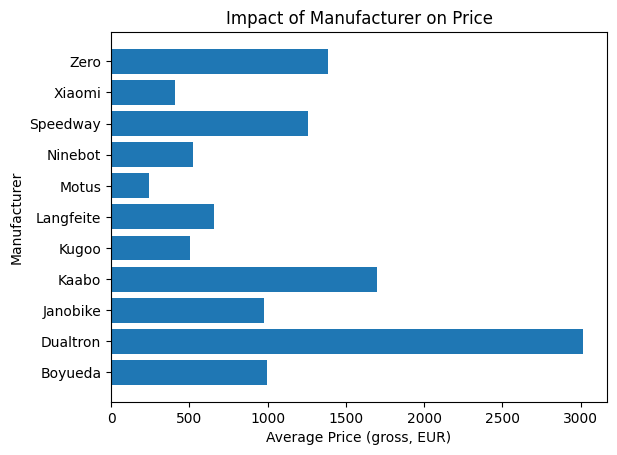

In [34]:

manufacturer_price_data = df.groupby('Manufacturer')['Price (gross, EUR)'].mean()

plt.barh(manufacturer_price_data.index, manufacturer_price_data.values)
plt.ylabel('Manufacturer')
plt.xlabel('Average Price (gross, EUR)')
plt.title('Impact of Manufacturer on Price')
plt.show()

## Observations:
By analyzing the average price of electric scooters across different manufacturers or brands, we gained insights into pricing patterns and variations in the market. This information can be valuable for consumers looking to make informed decisions based on their preferred brand or for manufacturers to understand how their pricing compares to competitors.



## GEOGRAPHIC SEGMENTATION

In [35]:
df1 = pd.read_csv('1_ev_charger_dataset.csv')
df1.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [36]:
df2 = pd.read_excel('2_ev_charging_station_dataset.xlsx', sheet_name='Table 4', header=1)
df2

,State/UT,EV Charging Facility
0,Andhra Pradesh,65
1,Arunachal Pradesh,4
2,Assam,19
3,Bihar,26
4,Chandigarh,4
5,Chhattisgarh,51
6,Delhi,66
7,Goa,17
8,Gujarat,87
9,Haryana,114


## Exploratory Dataset Analaysis

In [37]:
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)

DF1 Shape:  (24, 6)
DF2 Shape:  (31, 2)


In [38]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.2+ KB


In [39]:
df1.describe()

,2W,3W,4W,Bus,Chargers
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8421.458333,3853.166667,334.041667,28.500000,106.791667
std,10942.261145,8850.690961,476.930628,63.771331,96.623869
min,187.000000,234.000000,12.000000,0.000000,10.000000
25%,848.000000,512.750000,34.750000,0.000000,25.000000
50%,2967.500000,931.000000,129.000000,0.000000,67.500000
75%,10697.750000,2659.250000,434.000000,5.500000,180.250000
max,38558.000000,42881.000000,1895.000000,197.000000,317.000000


In [40]:
df2.describe()

,EV Charging Facility
count,31.000000
mean,49.548387
std,50.768651
min,1.000000
25%,4.000000
50%,26.000000
75%,81.500000
max,174.000000


##  States where demand of Electric Scooters is higher 

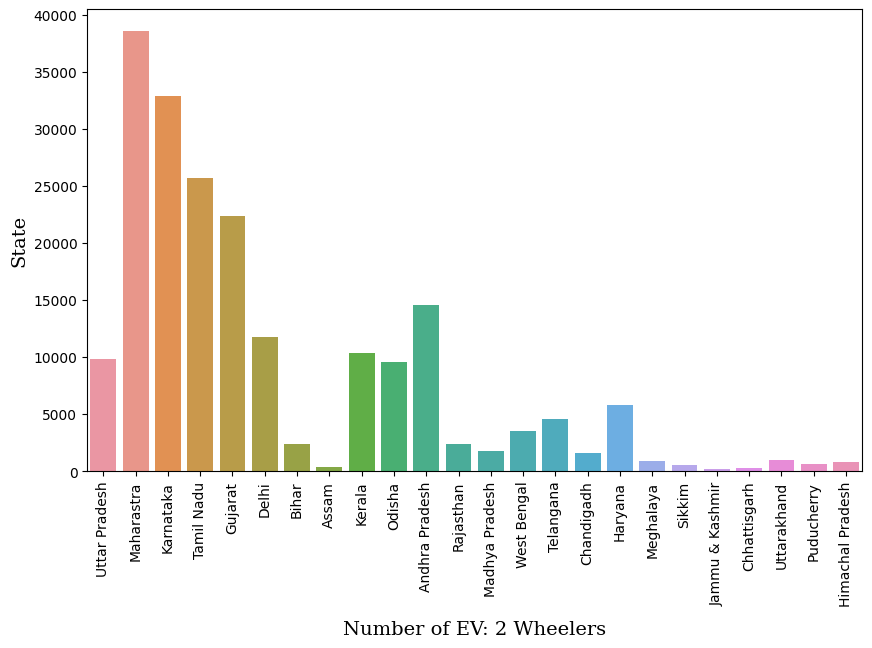

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='Region', y='2W', data=df1)

# Set labels and their properties
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers', family='serif', fontsize=14, labelpad=10)


plt.xticks(rotation=90)
plt.show()


## *Observations* :

This bar plot visualizes the number of Two Wheelers (2W) for each region. Based on the heights of the bars, we can see that:
   - Maharastra has the highest number of Two Wheelers, followed by Karnataka, Tamil Nadu, and Gujarat.
   - States like Uttar Pradesh, Delhi, Bihar, and Assam have moderate numbers of Two Wheelers.
   - Several states have relatively lower numbers of Two Wheelers, such as Kerala, Odisha, Chandigarh, Meghalaya, Sikkim, and        Jammu & Kashmir.
   - States like Chhattisgarh, Uttarakhand, Puducherry, and Himachal Pradesh have the lowest numbers of Two Wheelers.

The bar plot provides visual representation of the distribution of Two Wheelers across different regions. It allows us to compare the number of Two Wheelers in each region and identify the regions with the highest and lowest counts. This information can be useful for understanding the penetration of Two Wheelers in different geographic areas and can assist in making decisions related to infrastructure planning, marketing strategies, and policy-making specific to each region.



## Statewise Charging Facilities

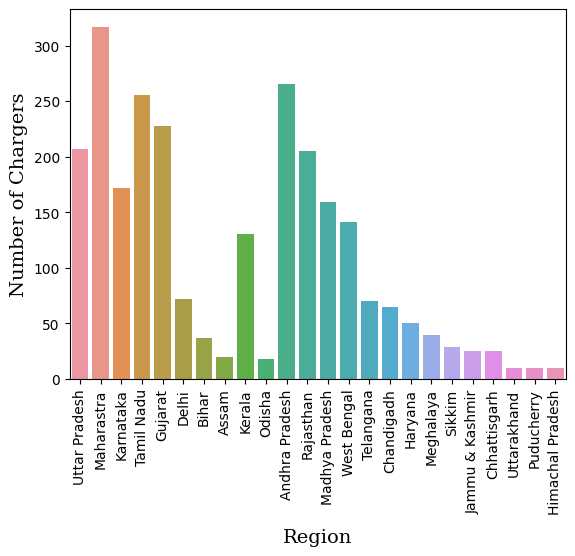

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot
sns.barplot(x='Region', y='Chargers', data=df1)

# Set labels and their properties
plt.ylabel('Number of Chargers', fontsize=14, family='serif')
plt.xlabel('Region', family='serif', fontsize=14, labelpad=10)
plt.xticks(rotation=90)
plt.show()


## *Observations* :
The bar plot provides a visual representation of the number of chargers available in each region.
The height of the bars indicates the quantity of chargers in each region.
Regional Variations: By comparing the heights of the bars, you can observe the variations in charger counts across different regions. 
Some regions have higher charger counts, while others have lower counts.The bar plot allows for geographic segmentation based on charger availability. You can categorize regions into segments such as high-charger regions, moderate-charger regions, and low-charger regions. This segmentation helps in understanding the state of electric vehicle charging infrastructure across different geographic areas.



## Are there any regions that show a significantly higher count of 2W vehicles compared to other vehicle categories in the geographic segmentation analysis?

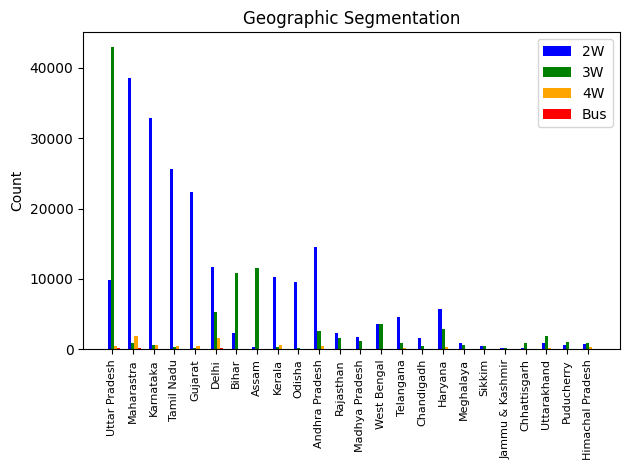

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Extract the region names
regions = df1['Region']

# Extract the count values for each category
count_2w = df1['2W']
count_3w = df1['3W']
count_4w = df1['4W']
count_bus = df1['Bus']

# Set the positions of the bars on the x-axis
x = np.arange(len(regions))

bar_width = 0.15
plt.bar(x - bar_width, count_2w, width=bar_width, color='blue', label='2W')
plt.bar(x, count_3w, width=bar_width, color='green', label='3W')
plt.bar(x + bar_width, count_4w, width=bar_width, color='orange', label='4W')
plt.bar(x + 2*bar_width, count_bus, width=bar_width, color='red', label='Bus')
plt.xticks(x, regions, rotation=90, fontsize=8)


plt.ylabel('Count')
plt.title('Geographic Segmentation')
plt.legend()
plt.tight_layout()
plt.show()


## *Observations* :

This bar plot provides a visual representation of the count of vehicles in different categories across regions. The categories include 2W (Two Wheelers), 3W (Three Wheelers), 4W (Four Wheelers), and Bus.
The height of the bars indicates the count of vehicles in each category. By comparing the heights of the bars within each region, you can observe the variations in vehicle category distribution.
In some regions, certain vehicle categories dominate over others. For example, in Uttar Pradesh and Tamil Nadu, the count of 2W vehicles is significantly higher compared to other categories. In Gujarat and Maharashtra, the count of 3W vehicles is relatively higher.
The plot can provide valuable insights for policymakers and planners in terms of understanding the vehicle landscape in different regions. It can help identify regions with a higher demand for certain vehicle categories and support decision-making regarding infrastructure development and policy implementation.



In [44]:

# Importing state-wise sales dataset
data = pd.read_csv('EVStats.csv')
data.head()

,Sl. No,State,Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules,Two Wheelers (Category L2 (CMVR)),Two Wheelers (Max power not exceeding 250 Watts),Three Wheelers (Category L5 slow speed as per CMVR),Three Wheelers (Category L5 as per CMVR),Passenger Cars (Category M1 as per CMVR),Buses,Total in state
0,1,Meghalaya,0,0,0,0,0,6,0,6
1,2,Nagaland,0,20,3,0,0,1,0,24
2,3,Manipur,16,8,11,0,5,12,0,52
3,4,Tripura,28,9,36,0,0,8,0,81
4,5,Andaman & Nicobar islands,0,0,0,0,0,82,0,82


## Is there a correlation between the count of two-wheelers and other vehicle categories across different states in the geographic segmentation analysis?

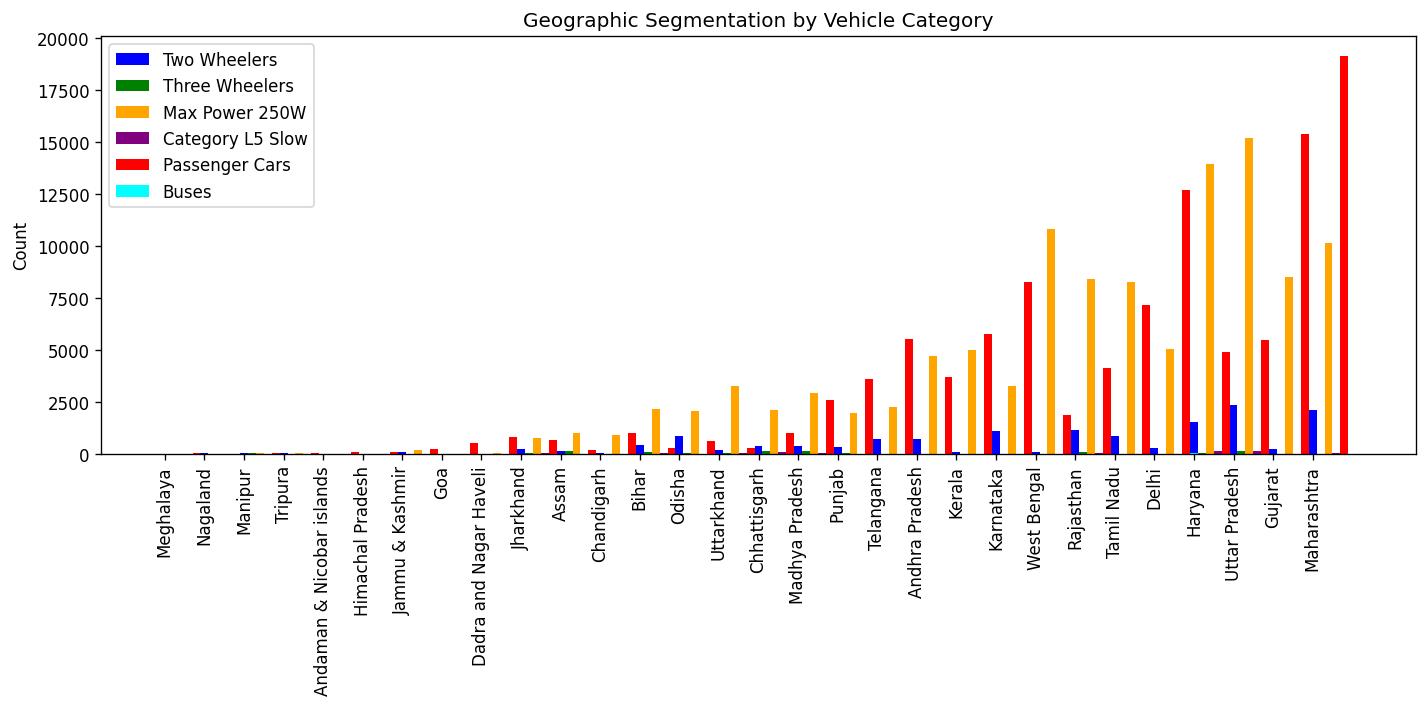

In [49]:
# Set the figure size and DPI
plt.figure(figsize=(12, 6), dpi=120)

# Extract the relevant columns from your dataset
states = data['State']
two_wheelers = data['Two Wheelers (Category L2 (CMVR))']
three_wheelers = data['Three Wheelers (Category L5 as per CMVR)']
max_power_250w = data['Two Wheelers (Max power not exceeding 250 Watts)']
category_l5_slow = data['Three Wheelers (Category L5 slow speed as per CMVR)']
passenger_cars = data['Passenger Cars (Category M1 as per CMVR)']
buses = data['Buses']

# Set the positions of the bars on the x-axis
x = list(range(len(states)))

# Set the width of each bar
bar_width = 0.2

# Plot the bars for each vehicle category
plt.bar(x, two_wheelers, width=bar_width, color='blue', label='Two Wheelers')
plt.bar([i + bar_width for i in x], three_wheelers, width=bar_width, color='green', label='Three Wheelers')
plt.bar([i + 2*bar_width for i in x], max_power_250w, width=bar_width, color='orange', label='Max Power 250W')
plt.bar([i + 3*bar_width for i in x], category_l5_slow, width=bar_width, color='purple', label='Category L5 Slow')
plt.bar([i + 4*bar_width for i in x], passenger_cars, width=bar_width, color='red', label='Passenger Cars')
plt.bar([i + 5*bar_width for i in x], buses, width=bar_width, color='cyan', label='Buses')

# Set the x-axis tick positions and labels
plt.xticks(x, states, rotation=90)

# Set the y-axis label
plt.ylabel('Count')

# Set the plot title
plt.title('Geographic Segmentation by Vehicle Category')

# Add a legend
plt.legend()

# Adjust the layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


## *Observations* :
- The bar plot displays the distribution of different vehicle categories across various states in the dataset.
- The categories considered are "Two Wheelers," "Three Wheelers," "Passenger Cars," and "Buses."
- Maharashtra, Uttar Pradesh, and Gujarat are the top three states with the highest count of vehicles across all categories.
- The "Two Wheelers" category has a relatively higher count in states like Gujarat, Maharashtra, and Karnataka.
- The count of "Three Wheelers" is notable in states like Uttar Pradesh, Madhya Pradesh, and Rajasthan.
- "Passenger Cars" have a significant presence in Delhi, Maharashtra, and Tamil Nadu.
- The count of "Buses" is comparatively low across all states in the dataset.

Geographic Segmentation:
- The bar plot helps in geographic segmentation by visually representing the distribution of vehicle categories across different states.
- It allows us to compare the counts of different vehicle categories within each state and identify patterns or variations.
- By examining the plot, we can observe the regional differences in vehicle preferences and the dominance of specific vehicle categories in certain states.
- This information is useful for understanding the market demand and consumer behavior related to different vehicle types in specific geographic regions.
- Geographic segmentation enables businesses and policymakers to tailor their strategies and policies to target specific regions and cater to the preferences and needs of the local population.

## PCA and K-Means

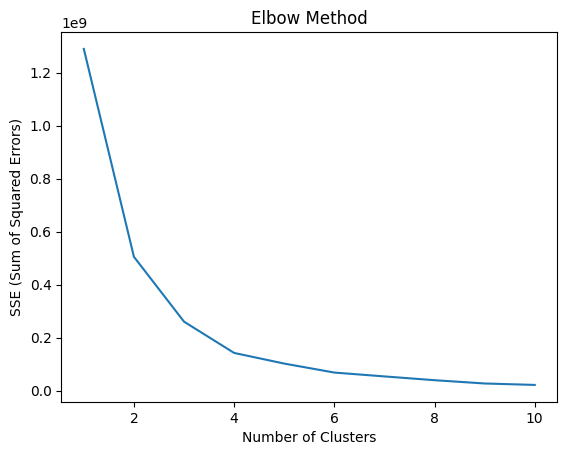

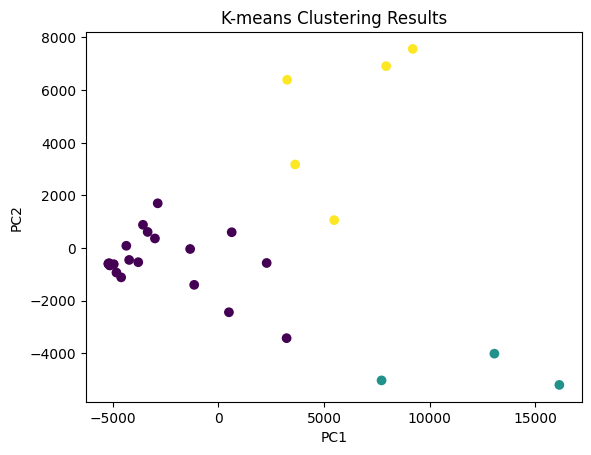

In [46]:
numeric_data = data.iloc[:, 2:-1]

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numeric_data)

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Find the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method')
plt.show()


k = 3  
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pca_df)

cluster_labels = kmeans.labels_

pca_df['Cluster'] = cluster_labels

# Visualize the clusters
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering Results')
plt.show()


In [47]:
pca_df

,PC1,PC2,Cluster
0,-5205.491438,-598.434544,0
1,-5205.843909,-591.673915,0
2,-5190.284863,-593.066556,0
3,-5175.036475,-571.211377,0
4,-5148.772110,-647.969890,0
5,-5136.831199,-658.398384,0
6,-4952.842997,-610.534682,0
7,-4827.113623,-928.887930,0
8,-4604.210844,-1110.994730,0
9,-4225.101153,-449.246436,0


The k-means algorithm assigns each data point to one of the clusters based on its similarity to the centroid (center) of that cluster. The different colors indicate the different clusters assigned to the data points. Data points with the same color belong to the same cluster, meaning they have similar characteristics based on the features used for clustering.By visualizing the clusters in the scatter plot, you can observe the grouping of data points based on their similarities. The plot allows you to identify patterns or relationships between the states based on the vehicles' category counts.

In [48]:
cluster_means = numeric_data.groupby(cluster_labels).mean()

cluster_sizes = pd.Series(np.bincount(cluster_labels))


segment_profiles = pd.concat([cluster_means, cluster_sizes.rename('Cluster Size')], axis=1)


print(segment_profiles)


   Two Wheelers (Category L1 & L2 as per Central Motor Vehicles Rules  \
0                                         284.000000                    
1                                        3735.666667                    
2                                        2018.800000                    

   Two Wheelers (Category L2 (CMVR))  \
0                         252.909091   
1                         855.000000   
2                        1188.000000   

   Two Wheelers (Max power not exceeding 250 Watts)  \
0                                       1471.590909   
1                                       7880.000000   
2                                      11304.600000   

   Three Wheelers (Category L5 slow speed as per CMVR)  \
0                                           5.954545     
1                                           2.000000     
2                                          50.400000     

   Three Wheelers (Category L5 as per CMVR)  \
0                                 22.045455  